# 4-port scwitcher FIFO
$$\quad$$



 


- [Section 1: training data](#training_data)
- [Section 2: deepQueueNet](#deepQueueNet)
  - learning curve
  - regression $\rho$
  - pdf/cdf

 
 $$\quad$$


>   This notebook is to predict   the delay distribution of a  packet  given the past T time steps' information when it arrives at a N-port switch. Namely, 
$$
[x_{t-T+1}, x_{t-T+1}, \cdots, x_t]\stackrel{f(\cdot)}{\longrightarrow} delay.
$$
> Here,  $x_t\in \mathbb{R}^{1\times C}$, where $C$ is the number of attribute features, $t$ denotes the time step. 
  
 
 
<html>
<body>  
<div align="center">
<img src="./assets/nodearch.png" alt="device_node"  width="250" height="230">
</div>
</body>
</html>
 
 


 $$\quad$$

 

 
 

In [1]:
import warnings  
warnings.filterwarnings("ignore")
# %load_ext autoreload     
# %autoreload 2
from code_deepQueueNet import deviceModel
from code_deepQueueNet.config import BaseConfig 
import matplotlib.pyplot as plt 
import seaborn as sns   
plt.style.use('ggplot')
%matplotlib inline 

You have imported code_sigcomm_dqn.



# $\quad$


## training_data

DataSource: MAP   
Folder: ```./data/4-port switch/_traces```   
Filename: forwarding-matrix_TI_trace_no.csv
 


# $\quad$
 

## deepQueueNet
 

 Now, let's implement our device model in tensorflow 1.13.1.
 

 
  ``algo flow``
> $$\quad$$
> <html>
    <body> 
    <div align="center">
    <img src="./assets/algo_flow_dqn.png" alt="flow"  width="520"  height="280">
    </div>
    </body>
    </html>
> $$\quad$$
> 
>
$$\quad$$

 

In [3]:
%%time 


from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
 

 
    
config=BaseConfig() 
model=deviceModel.deepQueueNet(config, 
                               target=['time_in_sys'], 
                               data_preprocessing=False)  #please turn it on when you run the cell for the first time  
model.build_and_training()

Batch per epoch: 59436

    iteration (in k)	    MSE- train/test1/test2    	    time used     

           1		  0.002821/0.002899/0.002516         1.36 min.       
           2		  0.002337/0.002396/0.002041         1.24 min.       
           3		  0.002241/0.002295/0.001925         1.22 min.       
           4		  0.001852/0.001880/0.001665         1.21 min.       
           5		  0.001690/0.001726/0.001400         1.21 min.       
           6		  0.001382/0.001380/0.000993         1.26 min.       
           7		  0.001091/0.001087/0.000787         1.18 min.       
           8		  0.001020/0.001010/0.000734         1.13 min.       
           9		  0.001417/0.001424/0.000930         1.11 min.       
          10		  0.000692/0.000685/0.000535         1.10 min.       
          11		  0.000561/0.000554/0.000396         1.11 min.       
          12		  0.000413/0.000408/0.000285         1.10 min.       
          13		  0.000416/0.000418/0.000298         1.11 min.       
          14		  0.00

# $\quad$
# $\quad$ 

## Analyzer
---
Please revise the   modelConfig in [code_deepQueueNet.config](./code_deepQueueNet/config.py) to use the trained model. 
  
- Learning Curve
- Regression $\rho$
- PDF/CDF
 
 
# $\quad$

``Learning Curve``

INFO:tensorflow:Restoring parameters from ./trained/model/model.ckpt-341


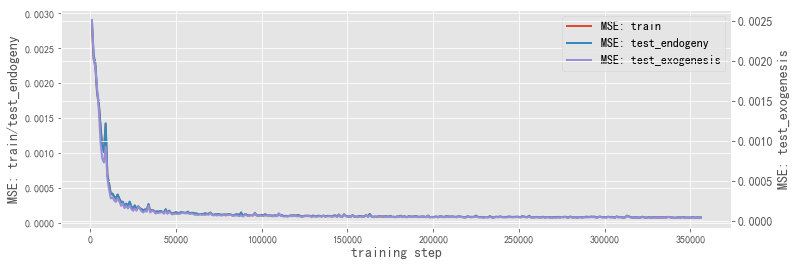

In [4]:
#load model 
from code_deepQueueNet.config import modelConfig
from code_deepQueueNet import  eval_metrics
 


ins= eval_metrics.REPO(BaseConfig(), modelConfig(), target=['time_in_sys'])
ins.loadModel_and_Eval()
ins.learning_curve()

# $\quad$

``Regression rho``

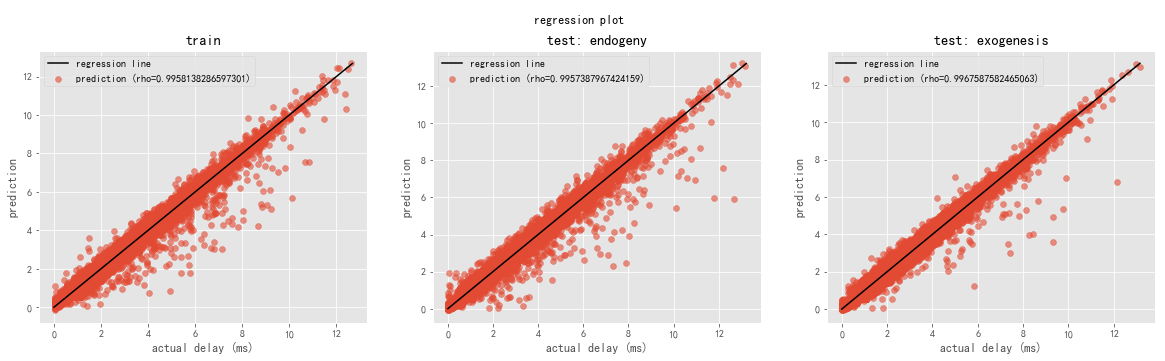

In [5]:
ins.regression_rho()

In [6]:
import scipy.stats as measures
from scipy.stats import wasserstein_distance


y=ins.y1
y_pred=ins.y1_pred
b1 = [0]*len(y)
print('\tW1/ground truth (deepqueuenet): {}'.format(wasserstein_distance(y, y_pred)/wasserstein_distance(b1, y)))

	W1/ground truth (deepqueuenet): 0.007885042254328628


# $\quad$

``PDF/CDF``

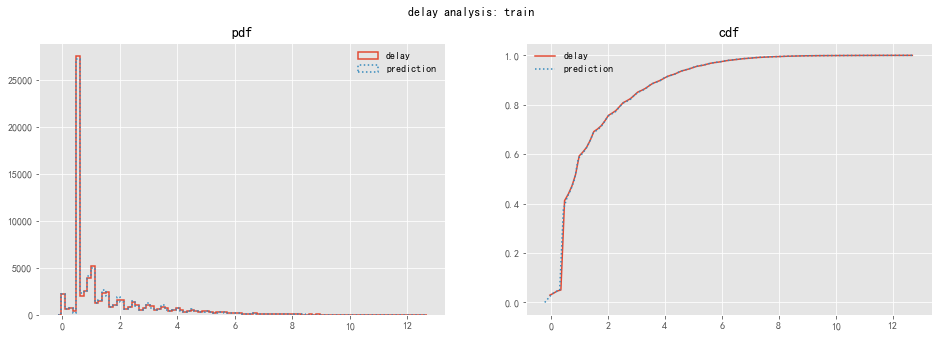

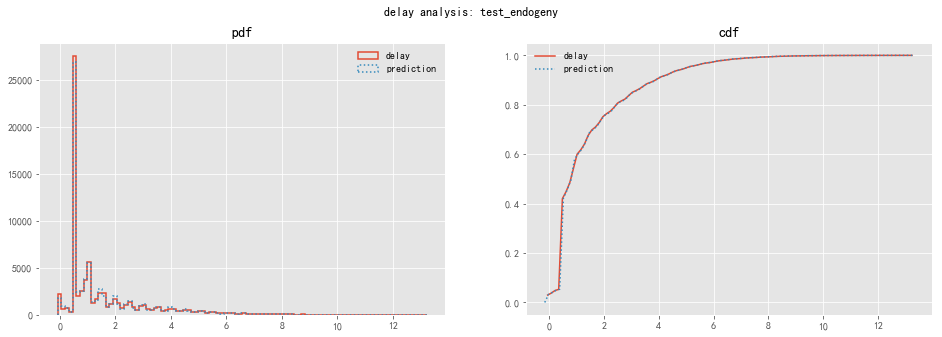

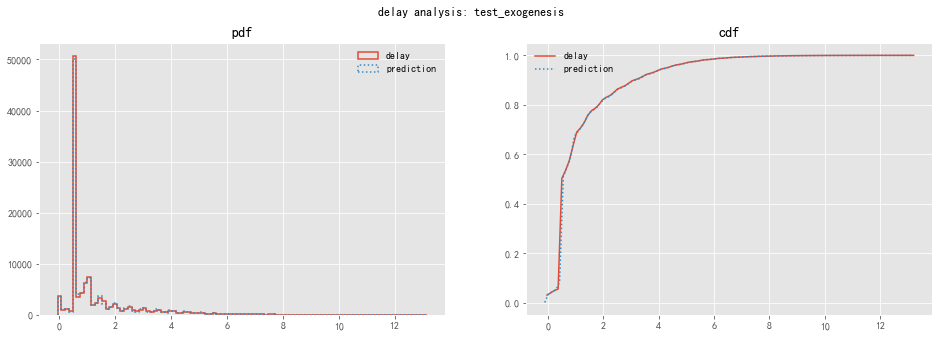

In [7]:
ins.distrib()

# $\quad$


# $\quad$ 


---

 

